In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

In [1]:
# Author: Mario Roca

# Dataset

Let's load data for classification. This data is generated and does not a precise meaning: the idea will be to build intuition about what is going on with different models.

Dataset can be downloaded here: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [4]:
# Load the dataset;
# make sure that the file is located in the same folder as the notebook
# (or change the path)
dataset = np.load("../Datasets/dataset.npy")

In [5]:
# Extract features and targets
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (300, 2)


# Bonus questions

These questions were added later and are optional. Points will still be awarded for those who complete them.

## Bagging and boosting

**Fit a bagging model on the dataset, and display the heatmap.**

No need to do any hyper-parameter tuning.

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_probability_heatmap(model, X, y, title):
    # Plot the probability heatmap
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X,
        response_method="predict_proba",
        cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
        alpha=0.5, # level of transparency
        levels=20 # use 20 different nuances of color
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

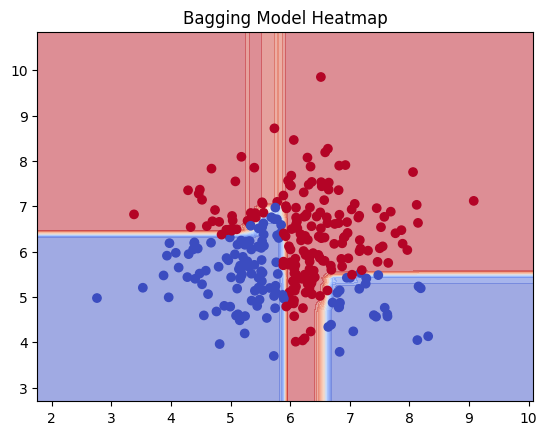

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Fit a bagging model
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X, y)

# Display the heatmap
plot_probability_heatmap(bagging_model, X, y, "Bagging Model Heatmap")

**Fit a boosting model on the dataset, and display the heatmap.**

No need to do any hyper-parameter tuning.

/Users/marioroca/mlclass/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


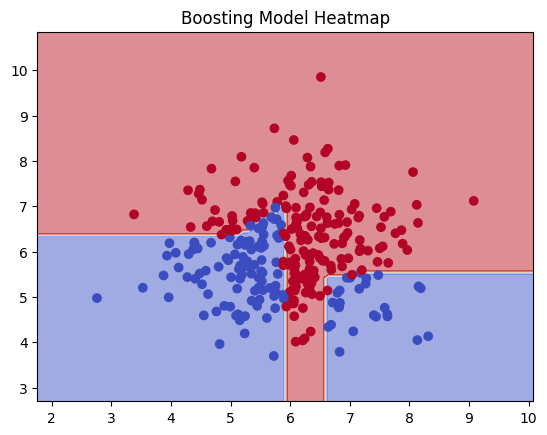

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Fit a boosting model
boosting_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
boosting_model.fit(X, y)

# Display the heatmap
plot_probability_heatmap(boosting_model, X, y, "Boosting Model Heatmap")

## Multi-class, higher dimension classification

For this part, we are going to use the MNIST dataset again. We can download a lower-dimension version of the one we used in lab 3, with images of size 8x8, using scikit-learn utility functions. Initially, values are between 0 and 16. We will normalize them to values between 0 and 1.

In [16]:
from sklearn.datasets import load_digits

In [17]:
digits = load_digits(return_X_y=False)

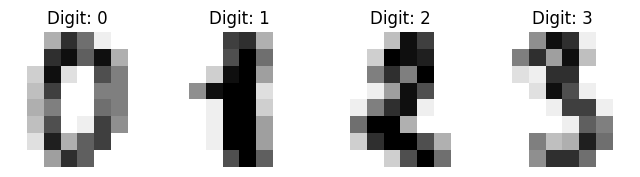

In [18]:
# Display the first 4 digits
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x, y in zip(axes, digits.data, digits.target):
    ax.set_axis_off() # do not display scale on axes
    img = x.reshape(8,8) / 16 # resize 64 dim vector as an 8 x 8 array of pixels and scale values to 0-1
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1) # display image in gray scale, with values from 0 to 1
    ax.set_title(f"Digit: {y}")

We will only keep digits 1, 2 and 3 to simplify things.

In [19]:
# only keep features for which target is 1, 2, or 3 
X_123, y_123 = zip(*[(x, y) for x, y in zip(digits.data, digits.target) if y in [1,2,3]])
X_123, y_123 = np.array(X_123) / 16, np.array(y_123) # normalizing training features to values between 0 and 1
print(f"Number of samples kept: {X_123.shape[0]}")

Number of samples kept: 542


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_123, y_123, test_size=0.20, random_state=42)
print(f"Training samples: {y_train.shape[0]}, test samples: {y_test.shape[0]}")

Training samples: 433, test samples: 109


**Fit a model on this multi-class dataset, and display the resulting decision boundary**

Here, we have more than 2 classes, and the dataset is not 2D: you will have to think about a solution that is a bit different from what we did in the rest of the lab.

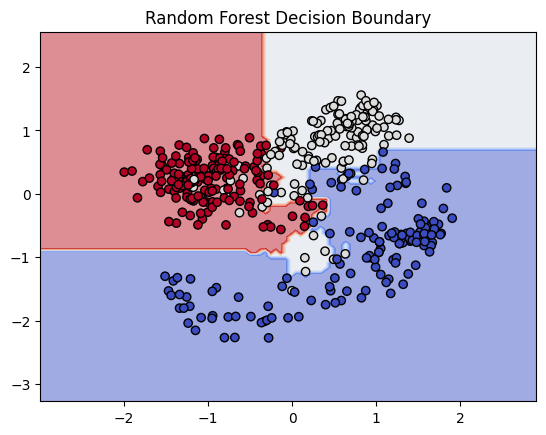

In [21]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Plot the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    rf_model, X_train_pca,
    response_method="predict",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Random Forest Decision Boundary")
plt.show()